___
# PROJETO 1

## <font color='red'>Felipe Giorgi Vaz Guimarães</font>
___

## <font color='blue'>A DIFERENÇA SOCIAL ENTRE APOSENTADOS NEGROS E BRANCOS</font>

## Introdução

É comum ouvir por ai que a diferença social entre raças no Brasil é muito grande, dizem que grande maioria dos negros no Brasil vivem em piores condições que brancos. Com o fim de explorar ainda mais essas diferenças, fiz uma pesquisa comparatoria das populações de aposentados brancos e aposentados negros. Esta pesquisa tem como objetivo deixar claro estas diferenças com dados e números da Pnad 2014. A pesquisa trara uma série de tabelas, números e gráficos que deixam claro estas diferenças que existem desde o periodo colonial e continuam até os dias de hoje.

___
## Análise e Resultados

In [138]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import math
import os

In [139]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Felipe Giorgi\Desktop\2º Semestre\Ciência dos Dados\Projeto 1


In [140]:
#Leitura da base já em formato de DataFrame e extensão .csv
pnad2014 = pd.read_csv('PES2014.csv', sep=',')

In [141]:
#Criei um DataFrame com dados só de aposentados.
aposentados = pd.DataFrame(pnad2014[pnad2014.V9122 == 2])

In [142]:
#Exclui da coluna de V4750(Renda) os indivuos que tinham como renda NaN e aqueles que tinham como renda 999 999 999 999
aposentados.V4750 = aposentados.V4750[(aposentados.V4750 != 999999999999) & (~aposentados.V4750.isnull())]

In [143]:
#Mostrei que a categoria V0404(Raça) é qualitativa
aposentados.V0404 = aposentados.V0404.astype('category')

In [144]:
#Alterei o nome das variáveis da coluna V0404
aposentados.V0404.cat.categories = ('Indigena', 'Branco', 'Negro','Amarelo','Pardo')

In [145]:
#Mostrei que a categoria V0601(Alfabetização) é qualitativa
aposentados.V0601 = aposentados.V0601.astype('category')

In [146]:
#Alterei o nome das variáveis da coluna V0601
aposentados.V0601.cat.categories = ('Alfabetizado', 'Analfabeto')

In [147]:
#Mostrei que a categoria V0606 é qualitativa
aposentados.V0606 = aposentados.V0606.astype('category')

In [148]:
#Alterei o nome das variáveis da coluna V0606
aposentados.V0606.cat.categories = ('Sim','Não')

In [149]:
#Mostrei que a categoria V6007(Curso mais alto que frequentou) é qualitativa
aposentados.V6007 = aposentados.V6007.astype('category')

In [150]:
#Alterei o nome das variáveis da coluna V6007
aposentados.V6007.cat.categories = ('Primario','Médio 1º ciclo','Médio 2º ciclo','Regular do ensino fundamental','Regular do ensino médio','Supletivo do ensino fundamental','Supletivo de ensino médio','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA','Jardim de infância')

In [151]:
aposentados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
5,5,2014,11,15,3,1,4,5,1,1937,...,1,724,3,2,2,NaN,NaN,2,724,20160623
11,11,2014,11,15,5,1,4,13,7,1946,...,4,855,4,2,2,NaN,NaN,2,855,20160623
25,25,2014,11,15,10,1,2,15,10,1948,...,2,2362,6,2,1,1,1,1,2362,20160623
26,26,2014,11,15,10,2,4,24,6,1952,...,2,2362,6,5,2,NaN,NaN,2,2362,20160623
51,51,2014,11,23,1,5,2,25,1,1924,...,5,444,3,1,2,NaN,NaN,2,444,20160623


In [152]:
#n indica o número de aposentados
n=aposentados.shape[0]

In [153]:
#Criei um DataFrame com dados só de aposentados negros
AposentadosNegros = pd.DataFrame(aposentados[aposentados.V0404 == 'Negro'])

In [154]:
AposentadosNegros.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
51,51,2014,11,23,1,5,2,25,1,1924,...,5,444,3,1,2,NaN,NaN,2,444,20160623
232,232,2014,11,58,10,2,2,8,8,1947,...,3,358,2,1,2,NaN,1,1,358,20160623
624,624,2014,11,147,7,2,4,16,10,1946,...,2,724,3,2,2,NaN,NaN,2,724,20160623
714,714,2014,11,171,15,1,4,8,1,1958,...,1,1448,4,1,2,NaN,NaN,2,1448,20160623
718,718,2014,11,180,1,1,2,29,1,1966,...,4,1062,4,7,1,2,2,1,1062,20160623


In [155]:
#an indica o número de aposentados negros
an = AposentadosNegros.shape[0]

In [156]:
#Criei um DataFrame com dados só de aposentados brancos
AposentadosBrancos = pd.DataFrame(aposentados[aposentados.V0404 == 'Branco'])

In [157]:
AposentadosBrancos.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
5,5,2014,11,15,3,1,4,5,1,1937,...,1,724,3,2,2,NaN,NaN,2,724,20160623
25,25,2014,11,15,10,1,2,15,10,1948,...,2,2362,6,2,1,1,1,1,2362,20160623
62,62,2014,11,23,6,1,4,22,7,1941,...,2,362,2,5,2,NaN,NaN,2,362,20160623
66,66,2014,11,23,8,1,2,7,8,1949,...,2,2862,6,5,1,1,1,1,2862,20160623
77,77,2014,11,23,13,1,4,27,2,1956,...,2,924,4,2,1,2,2,1,924,20160623


In [158]:
#ab indica o número de aposentados brancos
ab = AposentadosBrancos.shape[0]

## <font color='red'>Dados da raça dos aposentados no Brasil</font>

In [159]:
aposentados.V0404.value_counts()

Branco      19712
Pardo       15123
Negro        3437
Amarelo       222
Indigena      149
dtype: int64

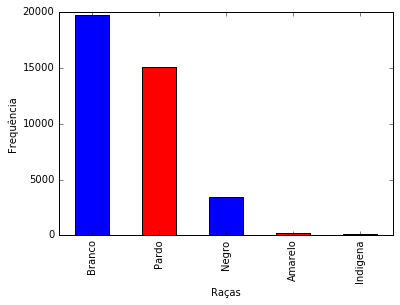

In [160]:
grafico2 = aposentados.V0404.value_counts()
grafico2.plot(kind='bar', color=('blue', 'red'), legend=False)
plt.ylabel('Frequência')
plt.xlabel('Raças')

In [161]:
print('Frequências relativas por Raça:')
ut1 = (aposentados.V0404.value_counts()/n*100).round(decimals=1)
print(ut1,'\n')

Frequências relativas por Raça:
Branco      51.0
Pardo       39.1
Negro        8.9
Amarelo      0.6
Indigena     0.4
dtype: float64 



Com estes dados das raças, pode se ver que a população de aposentados é maioritariamente composta de brancos, ao contrario do que se ve quando se considera toda população brasileira

## <font color='red'>Análise da escolaridade dos aposentados</font>

In [162]:
print('Frequências relativas por Alfabetização:')
ut2 = (aposentados.V0601.value_counts()/n*100).round(decimals=1)
print(ut2,'\n')

Frequências relativas por Alfabetização:
Alfabetizado    78.3
Analfabeto      21.7
dtype: float64 



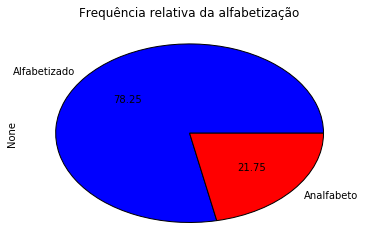

In [163]:
pV0601 = aposentados.V0601.value_counts()
pV0601.plot(kind='pie', colors=('blue', 'red'),title = 'Frequência relativa da alfabetização',autopct="%0.2f")

In [164]:
ct_V0601_V0404 = pd.crosstab(aposentados.V0404, aposentados.V0601, rownames=['Raça'], colnames=['Alfabetização'], margins=True)

In [165]:
print('Tabela Cruzada por total GERAL:')
ct_V0601_V0404

Tabela Cruzada por total GERAL:


Alfabetização,Alfabetizado,Analfabeto,All
Raça,,,
Indigena,100,49,149
Branco,17176,2536,19712
Negro,2396,1041,3437
Amarelo,210,12,222
Pardo,10357,4766,15123
All,30239,8404,38643


In [166]:
print('Tabela Cruzada por total GERAL (em %):')
ct1_V0601_V0404 = (ct_V0601_V0404/len(aposentados)*100).round(decimals=1)
ct1_V0601_V0404

Tabela Cruzada por total GERAL (em %):


,Alfabetizado,Analfabeto,All
Raça,,,
Indigena,0.3,0.1,0.4
Branco,44.4,6.6,51.0
Negro,6.2,2.7,8.9
Amarelo,0.5,0.0,0.6
Pardo,26.8,12.3,39.1
All,78.3,21.7,100.0


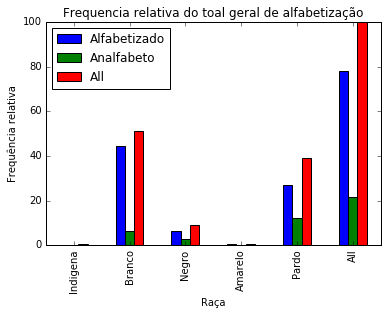

In [167]:
ct1_V0601_V0404.plot(kind = 'bar', title='Frequencia relativa do toal geral de alfabetização')
plt.ylabel('Frequência relativa')

In [168]:
print('Frequências relativas de aposentados brancos analfabetos:')
ut1 = (AposentadosBrancos.V0601.value_counts()/ab*100).round(decimals=1)
print(ut1,'\n')

print('Frequências relativas de aposentados negors analfabetos')
ut2 = (AposentadosNegros.V0601.value_counts()/an*100).round(decimals=1)
print(ut2,'\n')

Frequências relativas de aposentados brancos analfabetos:
Alfabetizado    87.1
Analfabeto      12.9
dtype: float64 

Frequências relativas de aposentados negors analfabetos
Alfabetizado    69.7
Analfabeto      30.3
dtype: float64 



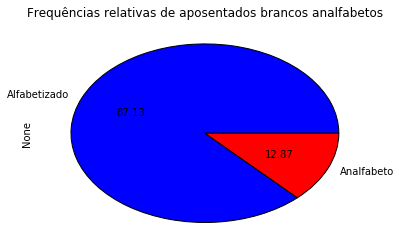

In [169]:
abV0601 = AposentadosBrancos.V0601.value_counts()
abV0601.plot(kind='pie', colors=('blue', 'red'),title = 'Frequências relativas de aposentados brancos analfabetos', autopct="%0.2f")

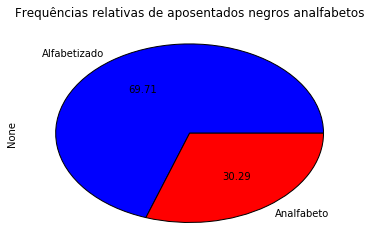

In [170]:
anV0601 = AposentadosNegros.V0601.value_counts()
anV0601.plot(kind='pie', colors=('blue', 'red'),title = 'Frequências relativas de aposentados negros analfabetos',autopct="%0.2f")

In [171]:
print('Frequências relativas de aposentados brancos que frequantaram escolas ou creches:')
ut1 = (AposentadosBrancos.V0606.value_counts()/ab*100).round(decimals=1)
print(ut1,'\n')

print('Frequências relativas de aposentados negors que frequantaram escolas ou creches:')
ut2 = (AposentadosNegros.V0606.value_counts()/an*100).round(decimals=1)
print(ut2,'\n')


Frequências relativas de aposentados brancos que frequantaram escolas ou creches:
Sim    89.0
Não    10.6
dtype: float64 

Frequências relativas de aposentados negors que frequantaram escolas ou creches:
Sim    76.1
Não    22.6
dtype: float64 



In [172]:
print('Curso mais elevado frequentado por aposentados brancos: ')
ut1 = AposentadosBrancos.V6007.value_counts()
ut1

Curso mais elevado frequentado por aposentados brancos: 


Primario                             7631
Superior de graduação                3171
Regular do ensino médio              1692
Médio 1º ciclo                       1544
Médio 2º ciclo                       1391
Regular do ensino fundamental        1290
Supletivo de ensino médio             244
Mestrado ou doutorado                 185
Supletivo do ensino fundamental       171
Classe de alfabetização - CA          123
Alfabetização de jovens e adultos      90
Jardim de infância                      3
Creche                                  1
dtype: int64

In [173]:
print('Curso mais elevado frequentado por aposentados negros: ')
ut1 = AposentadosNegros.V6007.value_counts()
ut1

Curso mais elevado frequentado por aposentados negros: 


Primario                             1245
Regular do ensino fundamental         325
Regular do ensino médio               270
Médio 1º ciclo                        242
Superior de graduação                 204
Médio 2º ciclo                        144
Supletivo do ensino fundamental        59
Classe de alfabetização - CA           42
Supletivo de ensino médio              39
Alfabetização de jovens e adultos      37
Mestrado ou doutorado                   7
Jardim de infância                      0
Creche                                  0
dtype: int64

In [174]:
print('Frequências relativas de cursos mais altos frequentados para aposentados brancos:')
ut2 = (AposentadosBrancos.V6007.value_counts()/ab*100).round(decimals=1)
print(ut2,'\n')

Frequências relativas de cursos mais altos frequentados para aposentados brancos:
Primario                             38.7
Superior de graduação                16.1
Regular do ensino médio               8.6
Médio 1º ciclo                        7.8
Médio 2º ciclo                        7.1
Regular do ensino fundamental         6.5
Supletivo de ensino médio             1.2
Mestrado ou doutorado                 0.9
Supletivo do ensino fundamental       0.9
Classe de alfabetização - CA          0.6
Alfabetização de jovens e adultos     0.5
Jardim de infância                    0.0
Creche                                0.0
dtype: float64 



In [175]:
print('Frequências relativas de cursos mais altos frequentados para aposentados negros:')
ut2 = (AposentadosNegros.V6007.value_counts()/an*100).round(decimals=1)
print(ut2,'\n')

Frequências relativas de cursos mais altos frequentados para aposentados negros:
Primario                             36.2
Regular do ensino fundamental         9.5
Regular do ensino médio               7.9
Médio 1º ciclo                        7.0
Superior de graduação                 5.9
Médio 2º ciclo                        4.2
Supletivo do ensino fundamental       1.7
Classe de alfabetização - CA          1.2
Supletivo de ensino médio             1.1
Alfabetização de jovens e adultos     1.1
Mestrado ou doutorado                 0.2
Jardim de infância                    0.0
Creche                                0.0
dtype: float64 



In [176]:
ct_V6007_V0404 = pd.crosstab(aposentados.V6007, aposentados.V0404, rownames=['Curso mais alto'], colnames=['Raça'], margins=False)

In [177]:
ct_V6007_V0404

Raça,Indigena,Branco,Negro,Amarelo,Pardo
Curso mais alto,,,,,
Primario,40,7631,1245,73,5824
Médio 1º ciclo,8,1544,242,23,891
Médio 2º ciclo,4,1391,144,18,653
Regular do ensino fundamental,12,1290,325,8,1252
Regular do ensino médio,7,1692,270,15,991
Supletivo do ensino fundamental,2,171,59,0,242
Supletivo de ensino médio,2,244,39,2,131
Superior de graduação,14,3171,204,61,949
Mestrado ou doutorado,2,185,7,5,50


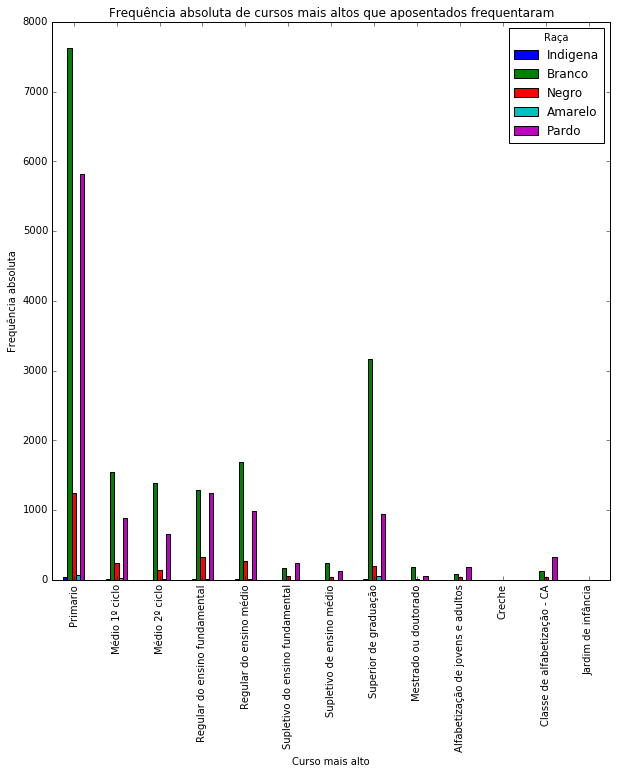

In [178]:
ct_V6007_V0404.plot(kind = 'bar', figsize=(10 , 10), title = 'Frequência absoluta de cursos mais altos que aposentados frequentaram')
plt.ylabel('Frequência absoluta')

Com os dados da escolaridade dos aposentados, pode-se ver que mais uma vez os brancos tem superioridade social. Mais de 87% dos brancos são alfabetizados, enquanto que menos de 70% dos negros são alfabetizados. Além disso, quase 90% dos aposentados brancos frequentaram escolas ou creches e apenas 76% aposentados negros frequentaram. Destes que frequentaram, 16,1% dos aposentados brancos cursaram cursos superiores e apenas 5,9% dos aposentados negros cursaram estes cursos.

## <font color='red'>Análise da renda dos aposentados brancos e negros</font>

In [179]:
print('Maior renda de um aposentado branco (em R$): ')
AposentadosBrancos.V4750.max()

Maior renda de um aposentado branco (em R$): 


331200.0

In [180]:
print('Maior renda de um aposentado negro (em R$): ')
AposentadosNegros.V4750.max()

Maior renda de um aposentado negro (em R$): 


12200.0

In [181]:
print('Media da renda mensal dos aposentados brancos (em R$): ')
int(AposentadosBrancos.V4750.mean())

Media da renda mensal dos aposentados brancos (em R$): 


1901

In [182]:
print('Media da renda mensal dos aposentados negros (em R$): ')
int(AposentadosNegros.V4750.mean())

Media da renda mensal dos aposentados negros (em R$): 


1071

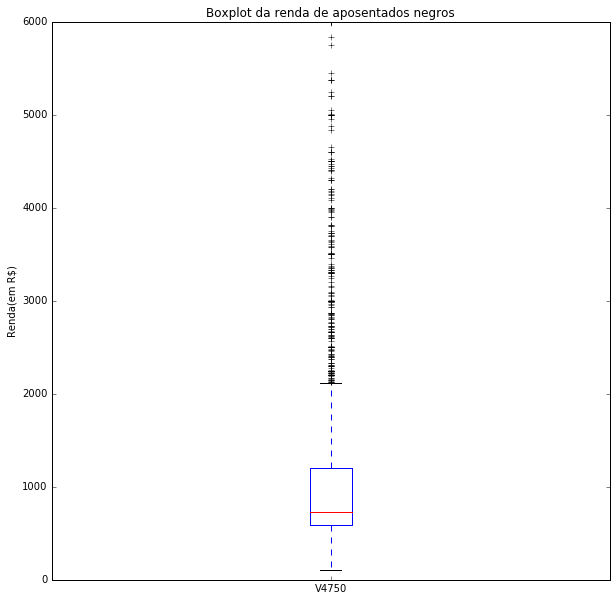

In [183]:
AposentadosNegros.V4750.plot (kind='box', figsize=(10,10), title = 'Boxplot da renda de aposentados negros')
plt.axis([0,2,0,6000])
plt.ylabel('Renda(em R$)')

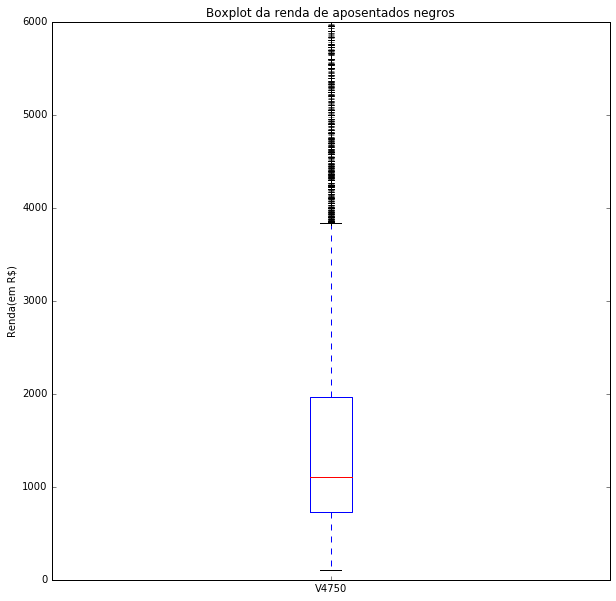

In [184]:
AposentadosBrancos.V4750.plot (kind='box', figsize=(10,10), title = 'Boxplot da renda de aposentados negros')
plt.axis([0,2,0,6000])
plt.ylabel('Renda(em R$)')

In [185]:
faixa = arange(500, 5001 ,125)

In [186]:
AposentadosBrancosRenda = pd.cut(AposentadosBrancos.V4750, faixa)
print('Frequencia relativa de aposentados brancos em cada faixa de renda:')
AposentadosBrancosRenda.value_counts()/ab*100

Frequencia relativa de aposentados brancos em cada faixa de renda:


(625, 750]      17.532468
(750, 875]       6.447849
(875, 1000]      6.184050
(1375, 1500]     6.143466
(1000, 1125]     5.839083
(1125, 1250]     4.489651
(500, 625]       3.967127
(1250, 1375]     3.688109
(1500, 1625]     2.597403
(1625, 1750]     2.338677
(1750, 1875]     2.135755
(1875, 2000]     2.074878
(2125, 2250]     1.567573
(2000, 2125]     1.537135
(2375, 2500]     1.313920
(2875, 3000]     1.090706
(2625, 2750]     1.039976
(2250, 2375]     0.943588
(2750, 2875]     0.837054
(2500, 2625]     0.837054
(3125, 3250]     0.771104
(3375, 3500]     0.760958
(3875, 4000]     0.695008
(3250, 3375]     0.578328
(3000, 3125]     0.547890
(3750, 3875]     0.492086
(3625, 3750]     0.466721
(4875, 5000]     0.466721
(4375, 4500]     0.456575
(3500, 3625]     0.421063
(4125, 4250]     0.375406
(4000, 4125]     0.309456
(4250, 4375]     0.309456
(4625, 4750]     0.299310
(4500, 4625]     0.273945
(4750, 4875]     0.152192
dtype: float64

In [187]:
AposentadosNegrosRenda = pd.cut(AposentadosNegros.V4750, faixa)
print('Frequencia relativa de aposentados negros em cada faixa de renda:')
AposentadosNegrosRenda.value_counts()/an*100

Frequencia relativa de aposentados negros em cada faixa de renda:


(625, 750]      23.043352
(750, 875]       8.757637
(500, 625]       7.826593
(875, 1000]      6.779168
(1000, 1125]     5.266221
(1375, 1500]     4.364271
(1125, 1250]     3.956939
(1250, 1375]     3.636893
(1500, 1625]     1.803899
(1625, 1750]     1.542042
(1875, 2000]     1.425662
(1750, 1875]     1.251091
(2125, 2250]     0.960140
(2000, 2125]     0.581903
(2375, 2500]     0.581903
(2750, 2875]     0.436427
(2625, 2750]     0.436427
(2875, 3000]     0.436427
(3250, 3375]     0.436427
(2250, 2375]     0.378237
(4375, 4500]     0.320047
(3625, 3750]     0.290951
(3875, 4000]     0.261856
(2500, 2625]     0.261856
(3375, 3500]     0.203666
(3500, 3625]     0.203666
(4875, 5000]     0.203666
(3000, 3125]     0.174571
(4125, 4250]     0.174571
(4500, 4625]     0.145476
(3125, 3250]     0.116381
(3750, 3875]     0.116381
(4250, 4375]     0.116381
(4000, 4125]     0.058190
(4750, 4875]     0.029095
(4625, 4750]     0.029095
dtype: float64

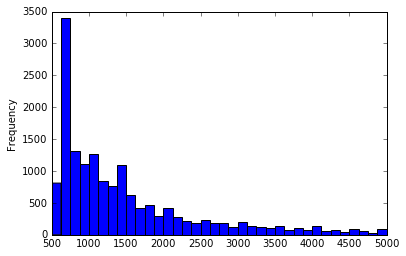

In [188]:
plot = AposentadosBrancos.V4750.plot.hist(bins =faixa)
plot

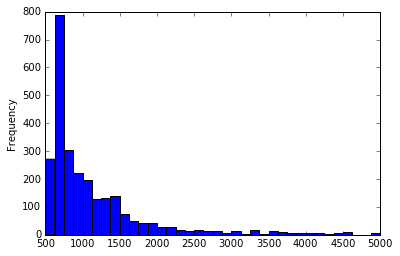

In [189]:
plot1 = AposentadosNegros.V4750.plot.hist(bins=faixa)


Na renda, vemos que a media de renda de aposentados brancos é maior que a de negros. Além disso, a frequencia relativa de negros nas faixas mais baixas é maior que a de brancos.

___
## Conclusão 

Após analisar todos os dados, fica claro que as condições sociais de brancos são melhores que a de negros. Em nenhum aspecto analisado as condições de vida do aposentado negro é melhor que a do branco. Com isso, as afirmações de que brancos tem melhores condições sociais do que negros, também valem para os aposentados.